# mini project

* grouby is for catagorical data. choose a class/catagory and check how a particular column or a feature performs
* Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role - can be done with reset_index and lambda as well


In [2]:
## All imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
import seaborn as sb


In [3]:
movies = pd.read_csv('titles.csv')
movies.head(4)

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017


In [4]:
cast = pd.read_csv('cast.csv')
cast.head(4)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN


In [5]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.head(4)

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05


In [13]:
#list all batman movies:
 movies[movies.title== 'Batman'] #note the syntax, it is like returning a list, this doesnt look like dict

,title,year
52734,Batman,1943
150621,Batman,1989


In [18]:
#List all Batman movies ever made - the right approach

batmanMovies = movies[movies.title.str.contains('Batman', case = False)]
print (batmanMovies.head(4))
len(batmanMovies)

                                             title  year
16813                              Batman: Anarchy  2016
30236                               Batman Forever  1995
31674                                Batman Untold  2010
31711  Scooby-Doo & Batman: the Brave and the Bold  2018


35

In [22]:
#Display the top 8 Batman movies in the order they were released
batmanMovies.sort_values(by = ['year'],ascending =True).iloc[:8]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973


In [25]:
# Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest
harrypMovies = movies[movies.title.str.contains('Harry Potter', case= False)]
harrypMovies.sort_values(by='year',ascending = False)

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


In [28]:
#How many movies were made in the year 2017?
len(movies[movies.year == 2017])

11474

In [29]:
#Section I - Q2 : How many movies were made in the year 2015?
len(movies[movies.year == 2015])

8702

In [33]:
# Section I - Q3 : How many movies were made from 2000 till 2018?
movies[(movies.year >= 2000) & (movies.year <= 2018)]

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014
...,...,...
244899,Poppy Goes to Hollywood,2016
244901,Thomson Villa,2014
244903,A Mero Hajur 2,2017
244906,Yin yang lu shi: Xuan yan zhou,2001


In [35]:
# Section I - Q4: How many movies are titled "Hamlet"?

hamletMovies = movies[movies.title.str.contains('Hamlet',case=False)]
len(hamletMovies)

57

In [36]:
# Section I - Q5: List all movies titled "Hamlet"
# The movies should only have been released on or after the year 2000
# Display the movies based on the year they were released (earliest to most recent)

hamletMoviesfilter= movies[(movies.title.str.contains('Hamlet',case=False)) & (movies.year >= 2000)]
hamletMoviesfilter.sort_values(by= ['year'],ascending =True)

,title,year
55639,Hamlet,2000
55525,Hamlet in the Hamptons,2002
137905,Hamlet_X,2003
218468,Hamlet X,2004
40045,Hamlet (II),2005
152920,"Dogg's Hamlet, Cahoot's Macbeth",2005
200246,The Tragedy of Hamlet Prince of Denmark,2007
176528,Hamlet (II),2007
156899,Hamlet (III),2007
52408,Hamlet the Vampire Slayer,2008


In [45]:
#Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
# supporting cast are NOT ranked by an "n" value (NaN)
# check for how to filter based on nulls

inceptionSupportCast = cast[(cast.title.str.contains('Inception',case=False))& (cast.n.isnull())]
len(inceptionSupportCast)

36

In [39]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [40]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


In [48]:
# Section I - Q7: How many roles in the movie "Inception" are of the main cast
# main cast always have an 'n' value
inceptionMainCast = cast[(cast.title.str.contains('Inception',case=False))& (cast.n.notnull())]
len(inceptionMainCast)

51

In [51]:
# Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception"
# main cast always have an 'n' value
# remember to sort!
inceptionMainCast.sort_values(by=['n'],ascending = True).iloc[:10]

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


In [52]:
# Section I - Q9:
# (A) List all movies where there was a character 'Albus Dumbledore'
# (B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
# For Part (B) remember the same actor might play the same role in multiple movies

cast[cast.character.str.contains('Albus Dumbledore',case= False)]

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792419,Harry Potter and the Deathly Hallows: Part 1,2010,Michael Gambon,actor,Professor Albus Dumbledore,39.0
792420,Harry Potter and the Deathly Hallows: Part 2,2011,Michael Gambon,actor,Professor Albus Dumbledore,2.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
792422,Harry Potter and the Half-Blood Prince,2009,Michael Gambon,actor,Professor Albus Dumbledore,2.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0
1685537,Ultimate Hero Project,2013,George (X) O'Connor,actor,Albus Dumbledore,NaN


In [53]:
cast[cast.character.str.contains('Albus Dumbledore',case= False)]['title']

704984                                       Epic Movie
792419     Harry Potter and the Deathly Hallows: Part 1
792420     Harry Potter and the Deathly Hallows: Part 2
792421              Harry Potter and the Goblet of Fire
792422           Harry Potter and the Half-Blood Prince
792423        Harry Potter and the Order of the Phoenix
792424         Harry Potter and the Prisoner of Azkaban
947789          Harry Potter and the Chamber of Secrets
947790            Harry Potter and the Sorcerer's Stone
1685537                           Ultimate Hero Project
1893421    Harry Potter and the Deathly Hallows: Part 1
2248085                                          Potter
Name: title, dtype: object

In [57]:
cast[cast.character.str.contains('Albus Dumbledore',case= False)]['name'].drop_duplicates()

704984            Dane Farwell
792419          Michael Gambon
947789          Richard Harris
1685537    George (X) O'Connor
1893421             Toby Regbo
2248085      Timothy Tedmanson
Name: name, dtype: object

In [59]:
# Section I - Q10:
# (A) How many roles has 'Keanu Reeves' played throughout his career?
# (B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.
keanuCast = cast[cast.name.str.contains('Keanu Reeves',case = False)]
len(keanuCast)

62

In [60]:
keanuCast 

,title,year,name,type,character,n
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0
1892343,A Scanner Darkly,2006,Keanu Reeves,actor,Bob Arctor,4.0
1892344,A Walk in the Clouds,1995,Keanu Reeves,actor,Paul Sutton,1.0
1892345,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0
1892346,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0
...,...,...,...,...,...,...
1892399,The Whole Truth,2016,Keanu Reeves,actor,Ramsey,1.0
1892400,Thumbsucker,2005,Keanu Reeves,actor,Perry Lyman,17.0
1892401,To the Bone,2017,Keanu Reeves,actor,Dr. Beckham,11.0
1892402,Tune in Tomorrow...,1990,Keanu Reeves,actor,Martin Loader,2.0


In [65]:
cast[(cast.name.str.contains('Keanu Reeves',case = False)) & (cast.n.notnull()) & (cast.year >= 1999)].sort_values(by=['year'],ascending = True)['character']

1892370                 Himself
1892369                 Dogstar
1892390                     Neo
1892398                 Griffin
1892397             Shane Falco
1892387        Donnie Barksdale
1892383             Nelson Moss
1892358           Conor O'Neill
1892379           Julian Mercer
1892391                     Neo
1892392                     Neo
1892351                 Dogstar
1892348        John Constantine
1892400             Perry Lyman
1892388              Alex Wyler
1892343              Bob Arctor
1892382    Detective Tom Ludlow
1892385                  Klaatu
1892396            Chris Nadeau
1892359             Henry Torne
1892342                     Kai
1892368             Donaka Mark
1892361               John Wick
1892366                    Evan
1892365                   Keanu
1892393                    Hank
1892353        Detective Galban
1892399                  Ramsey
1892384               The Dream
1892362               John Wick
1892401             Dr. Beckham
1892378 

In [78]:
# Section I - Q11:
# (A) List the total number of actor and actress roles available from 1950 - 1960

# (B) List the total number of actor and actress roles available from 2007 - 2017


castingType1 =cast[(cast.type == 'actor') | (cast.type == 'actress') & (cast.year >= 1950) & (cast.year <= 1960) ]
len(castingType1)

2596014

In [80]:
castingType2 =cast[(cast.type == 'actor') | (cast.type == 'actress') & (cast.year >= 2007) & (cast.year <= 2017) ]
len(castingType2)

3062312

In [89]:
# Section I - Q12:
# (A) List the total number of leading roles available from 2000 to present

# (B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

# (C) List the total number of support\extra-credit roles available from 2000 - present

leadingRoles = cast[(cast.n <= 10) & (cast.year >= 2000)]#does the first 10 actors qualify as leading
len(leadingRoles)

461385

In [90]:
nonLeadingRoles= cast[(cast.n > 10) &(cast.n.notnull()) & (cast.year >= 2000)]
len(nonLeadingRoles)

600893

In [92]:
extraRoles = cast[(cast.n.isnull()) & (cast.year >= 2000)]
len(extraRoles)

887484


## Section II

## Aggregations, Transformations and Visualizations

In [17]:
#What are the top ten most common movie names of all time?

topTen = movies.title.value_counts()[:10]

<AxesSubplot:>

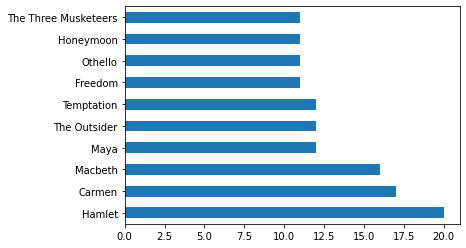

In [21]:
#Plot the top ten common movie names of all time

topTen.plot(kind='barh')

In [24]:
#Section II - Q1: Which years in the 2000s saw the most movies released? (Show top 3)
movies.year.value_counts()[:3]

2017    11474
2016     9440
2015     8702
Name: year, dtype: int64

In [32]:
# #Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
# Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
# You might need to sort before plotting

movies.sort_values(by= ['year'])

title                    year
#1 Serial Killer         2013    1
Rathrimazha              2007    1
Rated ATL                2016    1
Rater Kuheli             1988    1
Rater Rajanigandha       2016    1
                                ..
Heavenly Claws           2008    1
Heavenly Creatures       1994    1
Heavenly Days            1944    1
Heavenly Deposit         2018    1
xXx: State of the Union  2005    1
Length: 244914, dtype: int64

In [56]:
#calculae decade
#(year - year%10)
moviesG= movies

moviesG['Decade'] = moviesG.year - (movies.year%10)

In [57]:
moviesG.head()

,title,year,Decade
0,The Ticket to the Life,2009,2000
1,Parallel Worlds: A New Rock Music Experience,2016,2010
2,Morita - La hija de Jesus,2008,2000
3,Gun,2017,2010
4,Love or Nothing at All,2014,2010


<AxesSubplot:ylabel='Decade'>

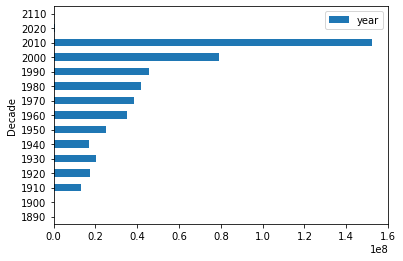

In [69]:
decadeCount = movies.sort_values(by=['year']).groupby(['Decade']).sum()
decadeCount.plot(kind = 'barh')

<AxesSubplot:ylabel='Decade'>

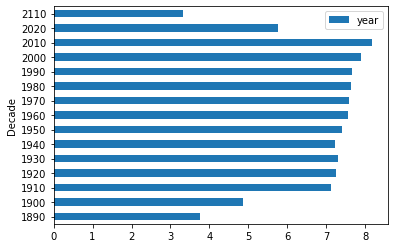

In [70]:
decadeCountNormalized  = np.log10(decadeCount )
decadeCountNormalized.plot(kind = 'barh')

In [83]:
# Section II - Q3:
# (A) What are the top 10 most common character names in movie history?

# (B) Who are the top 10 people most often credited as "Herself" in movie history?

# (C) Who are the top 10 people most often credited as "Himself" in movie history?
cast.head(5)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [88]:
cast.character.value_counts(sort = True)[:10]

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [97]:
cast[(cast.character == 'Herself')]['name'].value_counts()[:10]

Queen Elizabeth II        12
Joyce Brothers             9
Mar?a Luisa (V) Mart?n     9
Luisa Horga                9
Hillary Clinton            8
Margaret Thatcher          8
Oprah Winfrey              6
In?s J. Southern           6
Joan Rivers                6
Rekha                      6
Name: name, dtype: int64

In [98]:
cast[(cast.character == 'Himself')]['name'].value_counts()[:10]

Adolf Hitler          99
Richard Nixon         44
Ronald Reagan         41
John F. Kennedy       37
George W. Bush        25
Winston Churchill     24
Martin Luther King    23
Bill Clinton          22
Ron Jeremy            22
Benito Mussolini      21
Name: name, dtype: int64

In [104]:
# Section II - Q4:
# (A) What are the top 10 most frequent roles that start with the word "Zombie"?

# (B) What are the top 10 most frequent roles that start with the word "Police"?

# Hint: The startswith() function might be useful

cast[cast.character.str.startswith('Zombie')]['character'].value_counts()[:10]

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie #1                        36
Zombie Girl                      36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [105]:
cast[cast.character.str.startswith('Police')]['character'].value_counts()[:10]

Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

<AxesSubplot:xlabel='year'>

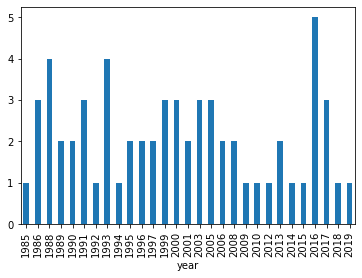

In [148]:
# Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

keanuRolesYear = cast [cast.name == 'Keanu Reeves'].groupby(['year'])['character'].count()

keanuRolesYear.plot(kind = 'bar')


<AxesSubplot:xlabel='year', ylabel='n'>

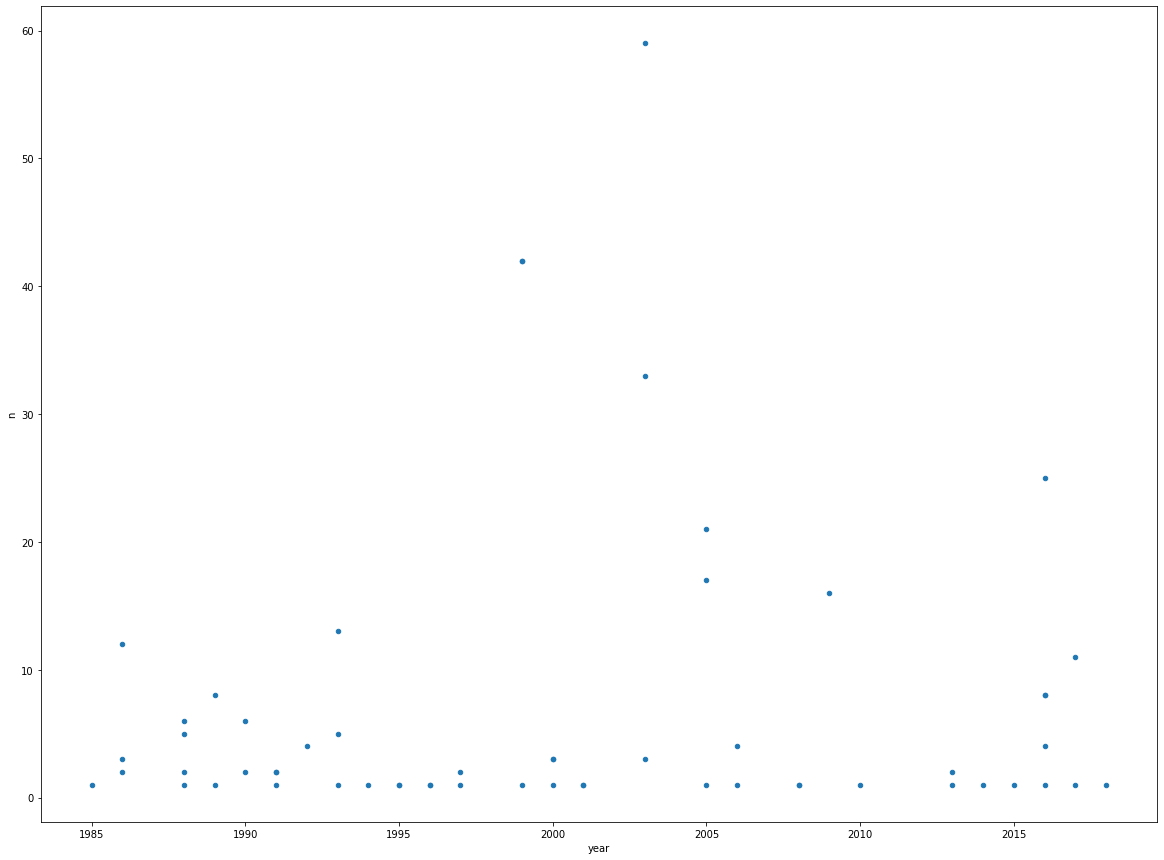

In [192]:
castYear = cast [cast.name == 'Keanu Reeves'].sort_values(by=['year'])[['year','n']]
# # plt.rcParams["figure.figsize"]=20,15
castYear.plot.scatter('year','n')

<AxesSubplot:xlabel='Decade'>

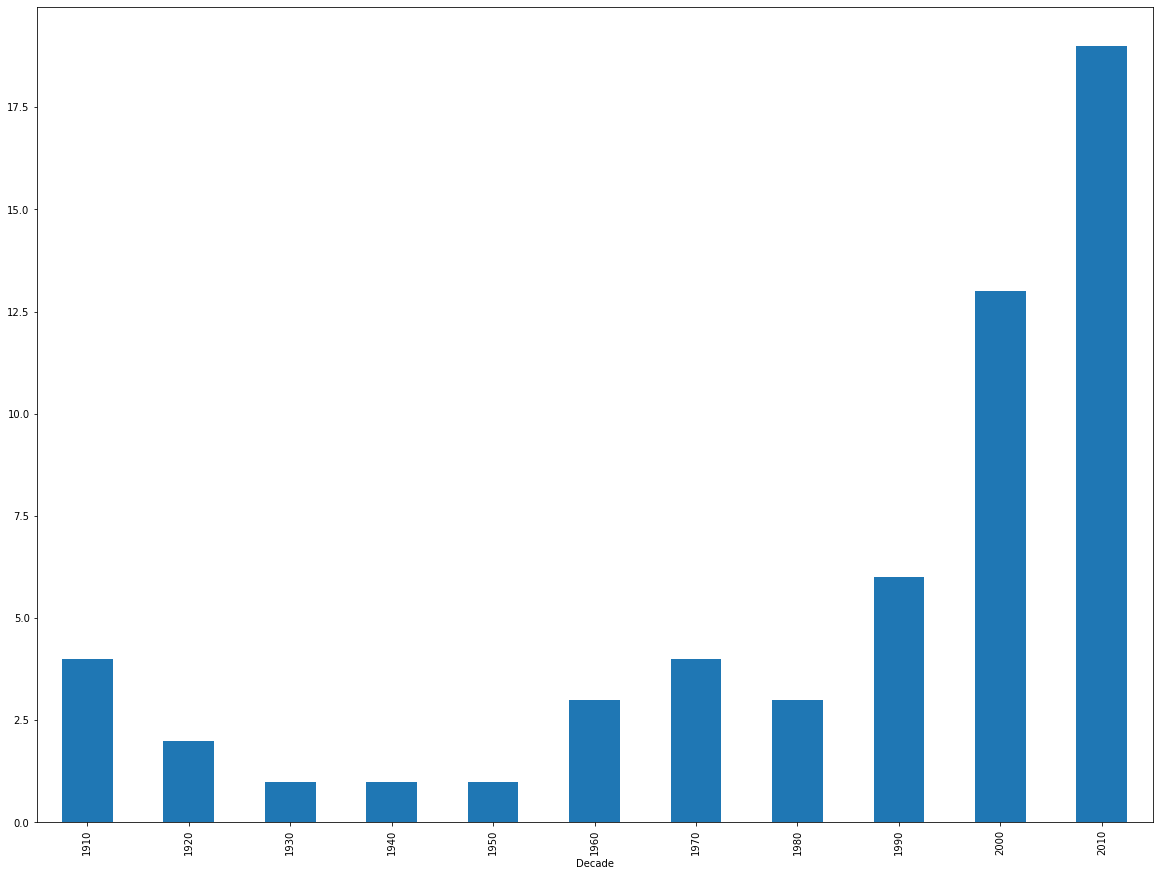

In [200]:
# Section II - Q7: Plot the number of "Hamlet" films made by each decade
hamletDecade = moviesG[moviesG.title.str.contains('Hamlet')].groupby(['Decade']).count()['year']
hamletDecade.plot(kind='bar')

In [201]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


In [13]:
# Section II - Q8:
# (A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

# (B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

# Hint: A specific value of n might indicate a leading role

cast[(cast.n <= 2) & (cast.year >= 1960) & (cast.year < 1970) ]['type'].value_counts()

actor      13972
actress     8646
Name: type, dtype: int64

In [14]:
cast[(cast.n <= 2) & (cast.year >= 2000) & (cast.year < 2010) ]['type'].value_counts()

actor      32135
actress    18949
Name: type, dtype: int64

In [35]:
# Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

frankRoles = cast[(cast.name.str.contains('Frank Oz',case = False))].sort_values(by=['year'])[['year','title']].value_counts()
frankRoles[frankRoles > 1]

year  title                               
1979  The Muppet Movie                        8
1984  The Muppets Take Manhattan              7
1992  The Muppet Christmas Carol              7
1981  The Great Muppet Caper                  6
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
1985  Follow That Bird                        3
1999  The Adventures of Elmo in Grouchland    3
1981  An American Werewolf in London          2
1982  The Dark Crystal                        2
dtype: int64

In [47]:
# Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

frankChar = cast[(cast.name.str.contains('Frank Oz',case = False))].sort_values(by=['year'])[['character']].value_counts()
frankChar[frankChar>1]

#frankChar.reset_index(name="count").query("count > 1")["character"]  also works

character     
Animal            6
Miss Piggy        6
Yoda              6
Cookie Monster    5
Sam the Eagle     5
Fozzie Bear       4
Bert              3
Grover            2
dtype: int64



## Section III - Advanced Merging, Querying and Visualizations

<AxesSubplot:>

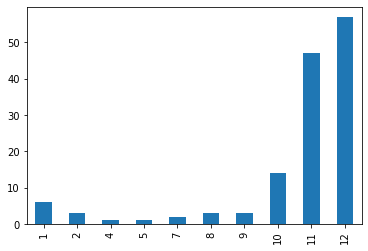

In [6]:
# Make a bar plot with the following conditions
# Frequency of the number of movies with "Christmas" in their title
# Movies should be such that they are released in the USA.
# Show the frequency plot by month


christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

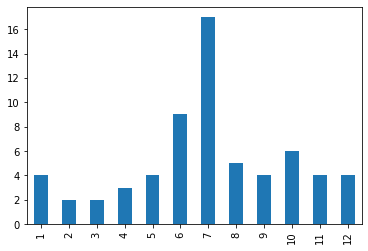

In [12]:
# Section III - Q1: Make a bar plot with the following conditions
# Frequency of the number of movies with "Summer" in their title
# Movies should be such that they are released in the USA.
# Show the frequency plot by month

summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind = 'bar')

<AxesSubplot:>

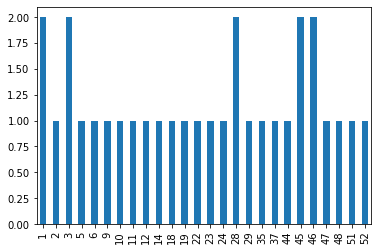

In [13]:
# Section III - Q2: Make a bar plot with the following conditions
# Frequency of the number of movies with "Action" in their title
# Movies should be such that they are released in the USA.
# Show the frequency plot by week

action= release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.isocalendar().week.value_counts().sort_index().plot(kind='bar')

In [15]:
# Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their release date in the USA sorted by the date of release
# Hint: You might need to join or merge two datasets!
release_dates.head(4)

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05


In [16]:
cast.head(4)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN


In [17]:
castDates = pd.merge(cast,release_dates)

In [18]:
castDates.head(4)

,title,year,name,type,character,n,country,date
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,Taiwan,2016-05-27
1,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,Germany,2016-10-06
2,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,France,2017-12-13
3,Closet Monster,2015,Aaron Abrams,actor,Peter Madly,1.0,Taiwan,2016-05-27


In [20]:
castDates[(castDates.name.str.contains ('Keanu Reeves',case=False)) & (castDates.n ==1) ].sort_values(by=['date']) [['title','date']]

,title,date
19526202,One Step Away,1985-09-13
16837127,The Night Before,1988-04-15
8395767,Bill & Ted's Excellent Adventure,1989-02-17
8395768,Bill & Ted's Excellent Adventure,1989-05-04
8395769,Bill & Ted's Excellent Adventure,1989-06-15
...,...,...
13522852,John Wick: Chapter 2,2017-05-18
13522853,John Wick: Chapter 2,2017-05-18
9850570,The Whole Truth,2017-06-08
9850571,The Whole Truth,2017-06-15


<AxesSubplot:>

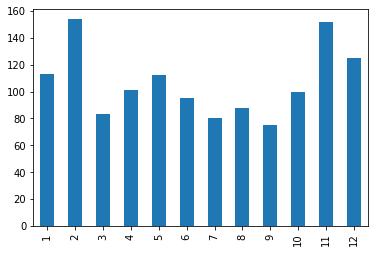

In [22]:
# Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?
keanuMovies = castDates[(castDates.name.str.contains ('Keanu Reeves',case=False))]
keanuMovies.date.dt.month.value_counts().sort_index().plot(kind = 'bar')

<AxesSubplot:>

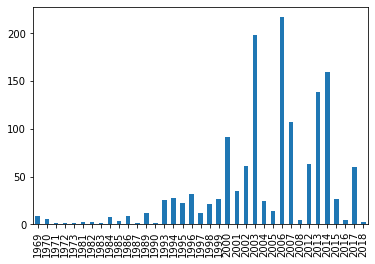

In [25]:
ianMovies = castDates[(castDates.name.str.contains ('Ian McKellen',case=False))]
ianMovies.date.dt.year.value_counts().sort_index().plot(kind='bar')